In [47]:
import warnings
warnings.filterwarnings('ignore') # :clown:

In [48]:
import numpy as np

In [49]:
from glob import glob
import matplotlib.pyplot as plt

In [50]:
import mne

In [51]:
files = glob('../data/ecg_raw/*.edf')

In [52]:
raw = mne.io.read_raw_edf(files[0], preload=True)

Extracting EDF parameters from d:\university\thesis\data\ecg_raw\30100_LAB_Conditions_ECG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8691999  =      0.000 ...  8691.999 secs...


Effective window size : 2.048 (s)


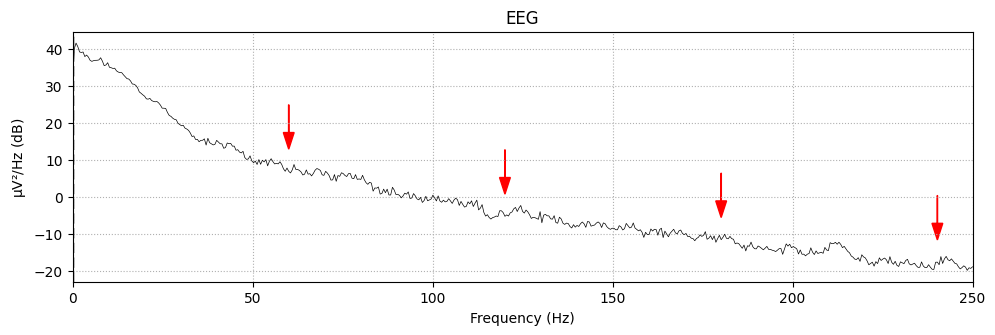

In [53]:
plt.clf()
fig = raw.compute_psd(tmax=np.inf, fmax=250).plot(
    average=True, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[:1]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )
fig

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 s)



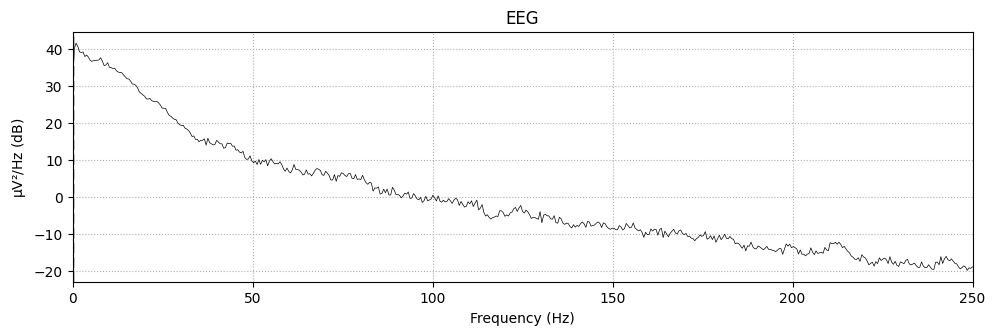

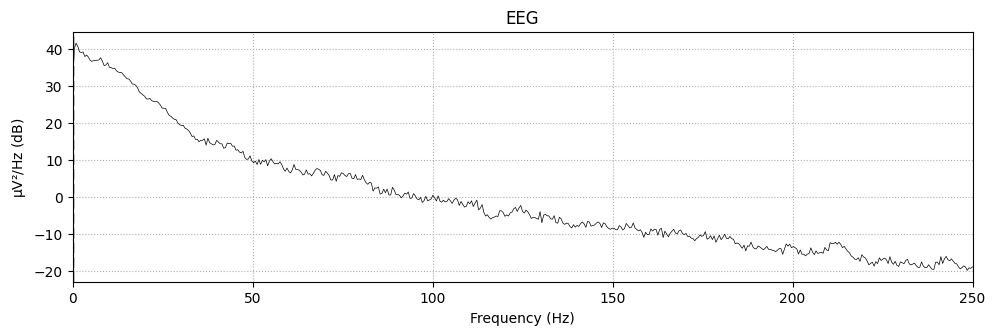

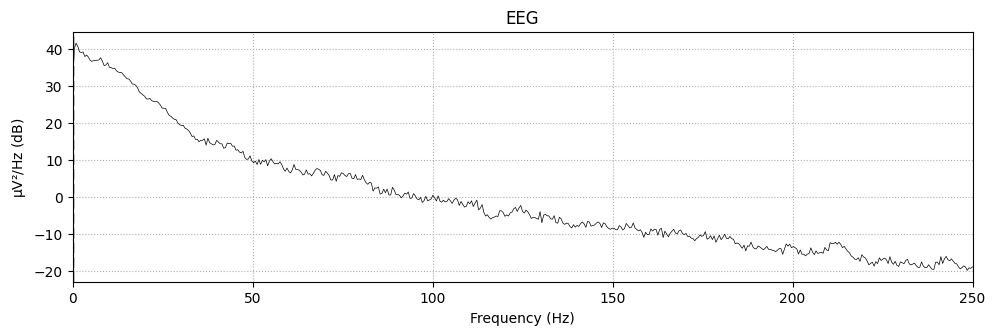

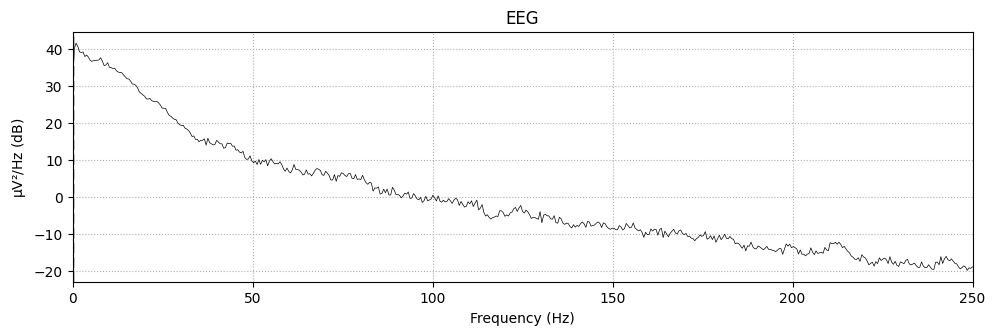

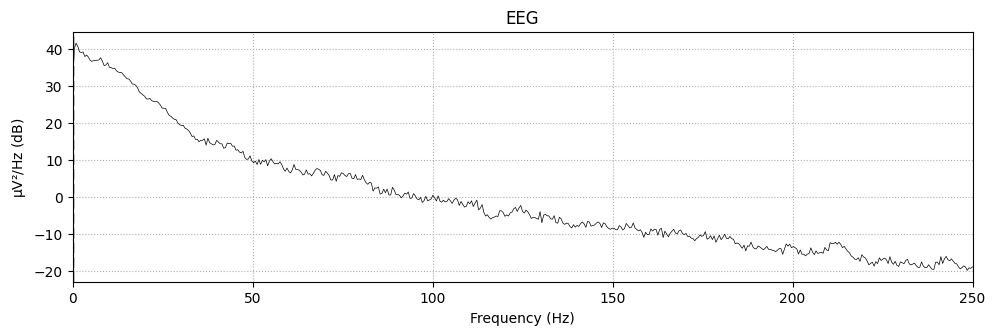

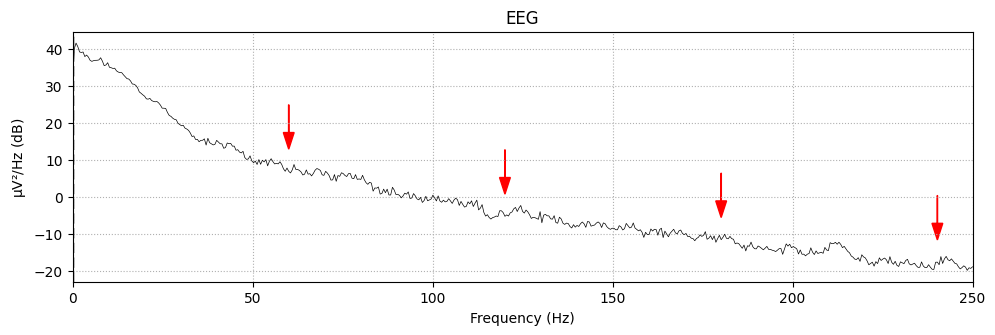

<MNELineFigure size 1000x350 with 0 Axes>

<MNELineFigure size 1000x350 with 0 Axes>

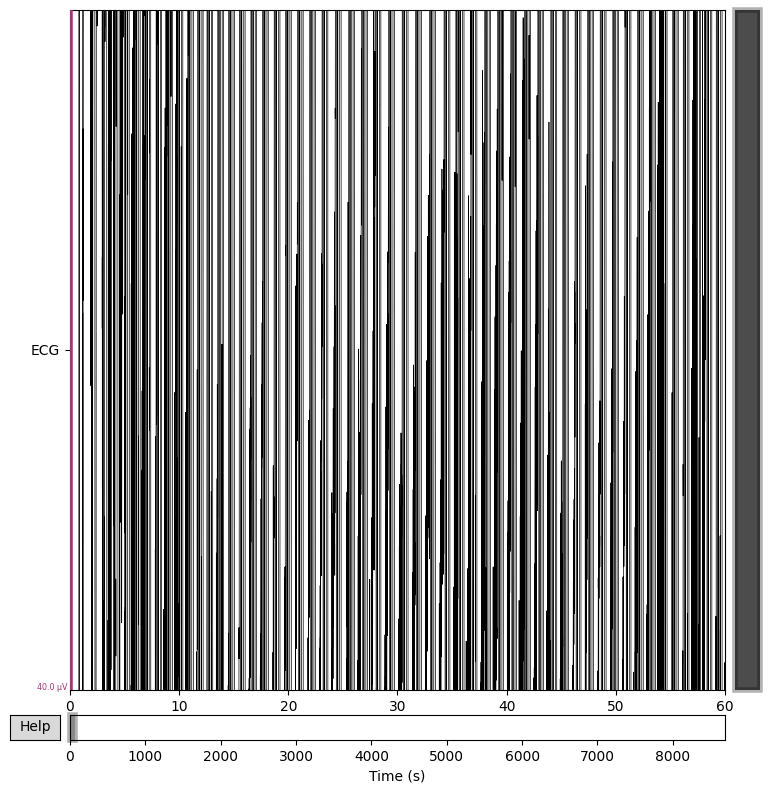

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 16501 samples (16.501 s)



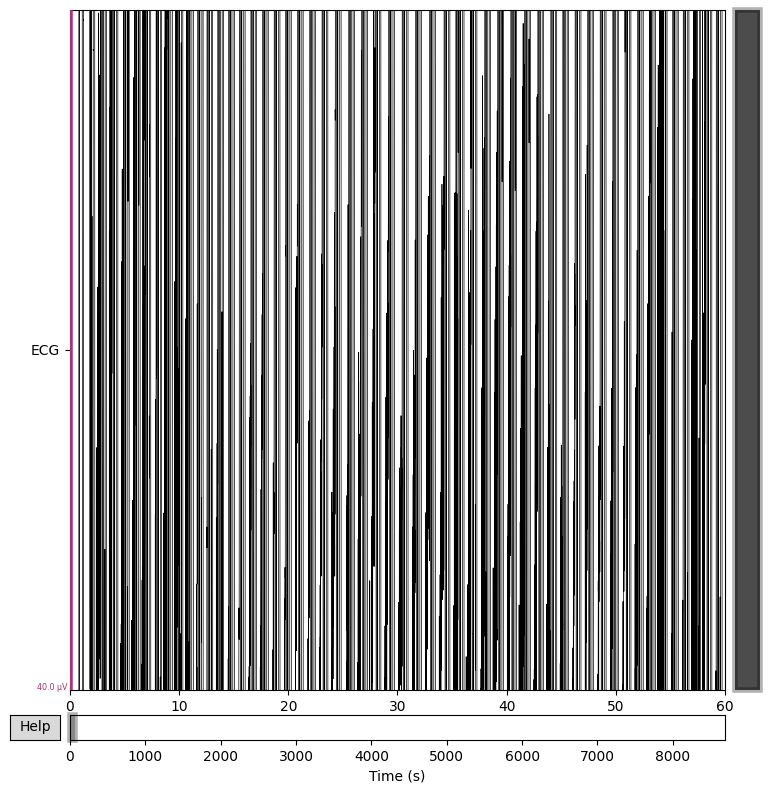

In [54]:
plt.clf()
for cutoff in (0.1, 0.2):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    with mne.viz.use_browser_backend("matplotlib"):
        fig = raw_highpass.plot(
            duration=60, proj=False, n_channels=len(raw.ch_names), remove_dc=False
        )
    fig.subplots_adjust(top=0.9)
    fig.suptitle(
        "High-pass filtered at {} Hz".format(cutoff), size="xx-large", weight="bold"
    )

In [55]:
filter_params = mne.filter.create_filter(
    raw.get_data(), raw.info["sfreq"], l_freq=0.2, h_freq=None
)

Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 16501 samples (16.501 s)



<Figure size 640x480 with 0 Axes>

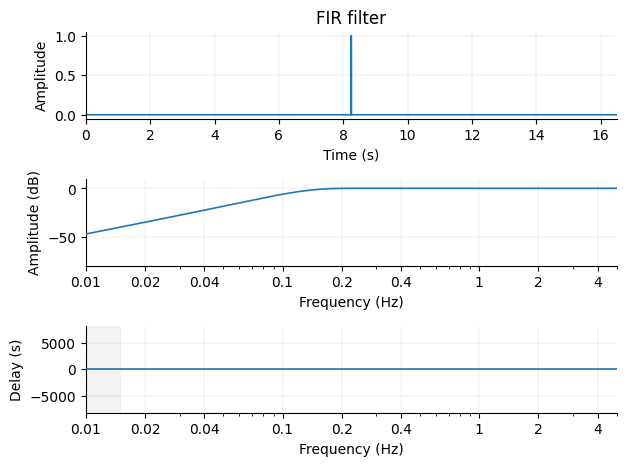

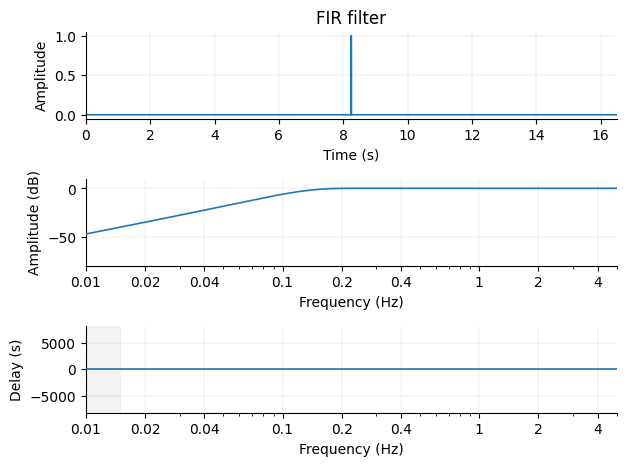

In [56]:
plt.clf()
mne.viz.plot_filter(filter_params, raw.info["sfreq"], flim=(0.01, 5))

Effective window size : 2.048 (s)


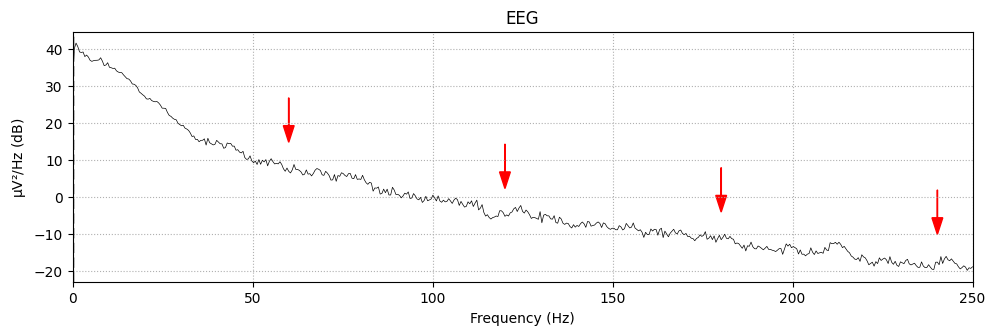

In [57]:
plt.clf()
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )


fig = raw.compute_psd(fmax=250).plot(average=True, picks="data", exclude="bads")
add_arrows(fig.axes[:2])
fig